In [164]:
import pandas as pd
import random
from time import sleep
import warnings
import numpy as np
import nltk
import os
from sklearn import datasets
import pickle
from nltk.tokenize import word_tokenize
from sklearn.decomposition import NMF, TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.neighbors import NearestNeighbors
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc, fbeta_score
from sklearn.model_selection import learning_curve, KFold, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.style as style
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings('ignore')

In [6]:
with open('data/df_all_rappers.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)
    
with open('models/lda_cv_all_rappers.pkl', 'rb') as picklefile:
    lda_cv = pickle.load(picklefile)
    
with open('data/lda_cv_data_all_rappers.pkl', 'rb') as picklefile:
    lda_cv_data = pickle.load(picklefile)

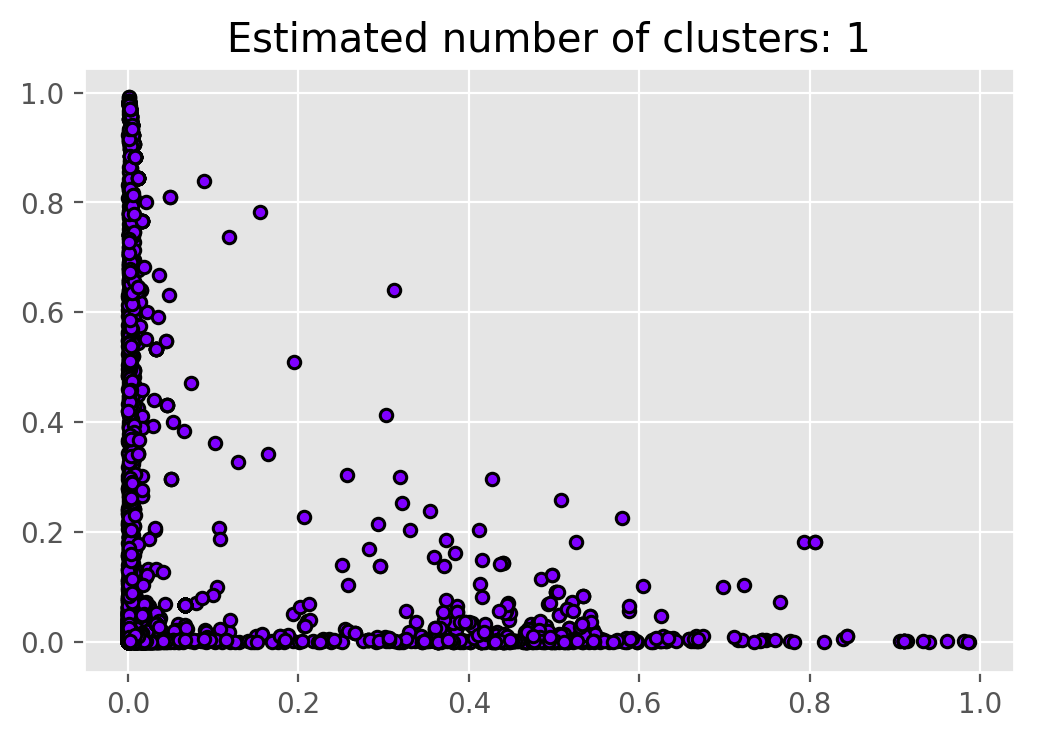

In [11]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, MeanShift

db = DBSCAN(eps=0.5, min_samples=5).fit(lda_cv_data)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
plt.figure(dpi=200)
show_core = True
show_non_core = True
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    if show_core:
        xy = lda_cv_data[class_member_mask & core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, edgecolors='k',  s=20, linewidths=1.1)
    
    if show_non_core:
        xy = lda_cv_data[class_member_mask & ~core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, s=20, linewidths=1.1)

plt.title('Estimated number of clusters: %d' % n_clusters_);

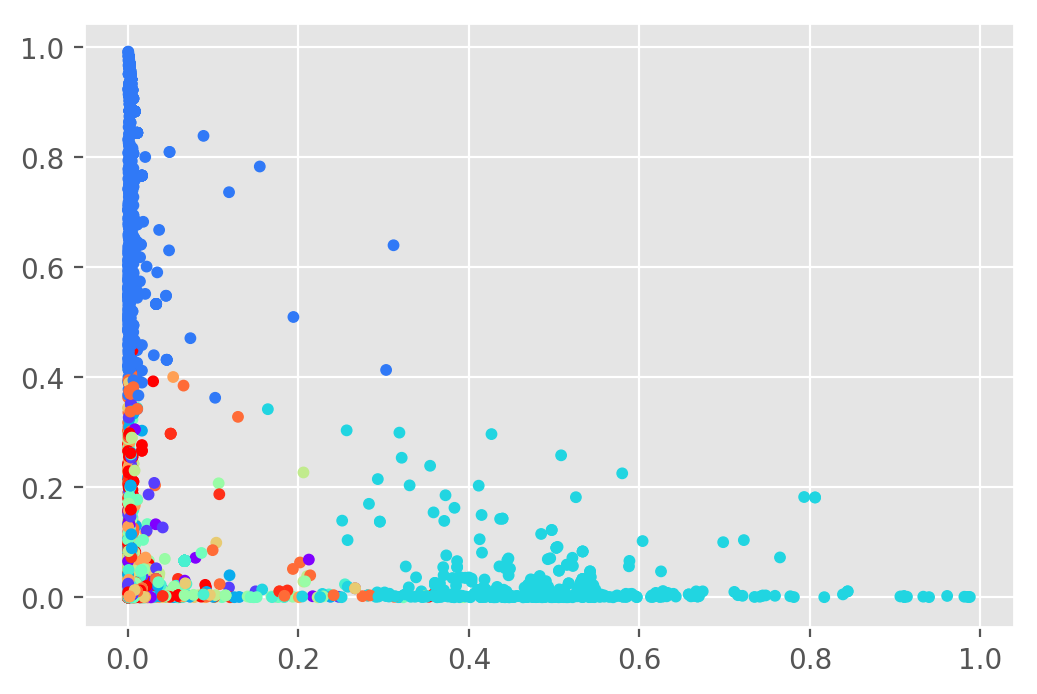

In [13]:
km = KMeans(n_clusters=15)
ypred = km.fit_predict(lda_cv_data)
#x,y = zip(*lda_cv_data)
plt.figure(dpi=200)
plt.scatter(lda_cv_data[:,0],lda_cv_data[:,1],c=plt.cm.rainbow(ypred*20),s=14);

In [66]:
list(range(15))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [46]:
print(km.labels_)
print(km.cluster_centers_)

[13 10 10 ... 10  9 10]
[[0.00575158 0.0197346  0.00446913 0.00740676 0.00769004 0.0064732
  0.00505822 0.01305387 0.42053108 0.00746396 0.00730888 0.00912385
  0.47102494 0.00663561 0.00827428]
 [0.00755164 0.02687213 0.53697384 0.00567934 0.00608354 0.00785131
  0.00701138 0.01251469 0.33627387 0.00698296 0.00751519 0.01035204
  0.01010701 0.00733061 0.01090044]
 [0.00648037 0.71751228 0.00471537 0.00970558 0.0051905  0.00633007
  0.00530806 0.00893477 0.19475974 0.00570731 0.00640061 0.00700967
  0.00625279 0.00675443 0.00893847]
 [0.00670229 0.02863197 0.00562338 0.0138296  0.00626294 0.48430504
  0.00462325 0.01038289 0.39401613 0.0062245  0.00638202 0.00809801
  0.00663441 0.00776897 0.01051459]
 [0.49356681 0.02559657 0.00873056 0.00840691 0.00617066 0.00691724
  0.00796669 0.00924643 0.39414124 0.00656163 0.00733718 0.00675003
  0.0046553  0.00736197 0.00659078]
 [0.0229802  0.035843   0.02163027 0.02499334 0.02167048 0.02223281
  0.36239522 0.02581659 0.32702651 0.02139932 0.0

In [19]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, verbose=1, perplexity=50).fit_transform(lda_cv_data)
X_embedded.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6304 samples in 0.006s...
[t-SNE] Computed neighbors for 6304 samples in 0.907s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6304
[t-SNE] Computed conditional probabilities for sample 2000 / 6304
[t-SNE] Computed conditional probabilities for sample 3000 / 6304
[t-SNE] Computed conditional probabilities for sample 4000 / 6304
[t-SNE] Computed conditional probabilities for sample 5000 / 6304
[t-SNE] Computed conditional probabilities for sample 6000 / 6304
[t-SNE] Computed conditional probabilities for sample 6304 / 6304
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.737045
[t-SNE] Error after 1000 iterations: 0.443206


(6304, 2)

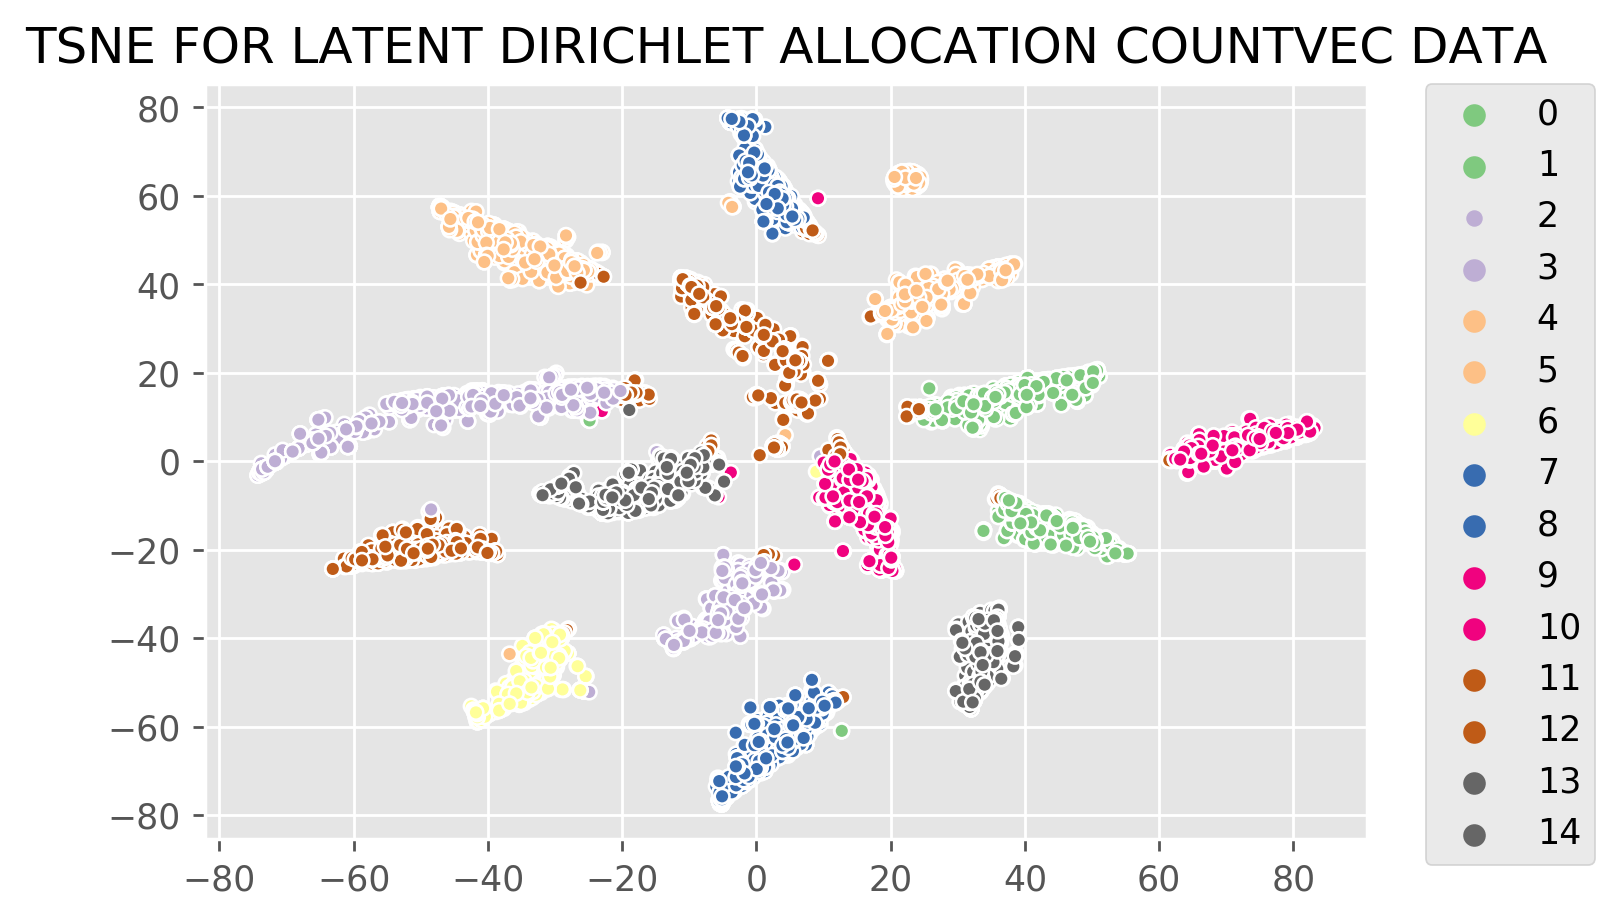

In [21]:
plt.figure(dpi=250)
plt.title("TSNE FOR LATENT DIRICHLET ALLOCATION COUNTVEC DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], ypred,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.', legend="full");

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [22]:
labels = np.asarray(ypred)

In [24]:
labels[:5]

array([13, 10, 10,  7, 10], dtype=int32)

In [25]:
df['labels'] = labels

In [26]:
df.head()

,song_owner,song_title,song_element,verse,artist,verse_words,verse_stem,verse_lem,rapper,labels
0,Childish Gambino,This Is America,[Bridge: Childish Gambino & Young Thug],"We just wanna party, Party just for you, We ju...",Childish Gambino,"[We, just, wan, na, party, ,, Party, just, for...","We just wan na parti , parti just for you , We...","We just wan na party , Party just for you , We...",1,13
1,Childish Gambino,This Is America,[Chorus: Childish Gambino],"This is America, Don't catch you slippin' now,...",Childish Gambino,"[This, is, America, ,, Do, n't, catch, you, sl...","thi is america , Do n't catch you slippin ' no...","This be America , Do n't catch you slippin ' n...",1,10
2,Childish Gambino,This Is America,"[Verse 1: Childish Gambino, Blocboy JB, Slim J...","This is America (skrrt, skrrt, woo), Don't cat...",Childish Gambino,"[This, is, America, (, skrrt, ,, skrrt, ,, woo...","thi is america ( skrrt , skrrt , woo ) , Do n'...","This be America ( skrrt , skrrt , woo ) , Do n...",1,10
3,Childish Gambino,This Is America,[Refrain: Choir & Childish Gambino],"Ooh-ooh-ooh-ooh-ooh, tell somebody, You go tel...",Childish Gambino,"[Ooh-ooh-ooh-ooh-ooh, ,, tell, somebody, ,, Yo...","ooh-ooh-ooh-ooh-ooh , tell somebodi , you go t...","Ooh-ooh-ooh-ooh-ooh , tell somebody , You go t...",1,7
4,Childish Gambino,This Is America,"[Chorus: Childish Gambino, Slim Jxmmi & Young ...","This is America (woo, ayy), Don't catch you sl...",Childish Gambino,"[This, is, America, (, woo, ,, ayy, ), ,, Do, ...","thi is america ( woo , ayi ) , Do n't catch yo...","This be America ( woo , ayy ) , Do n't catch y...",1,10


In [49]:
df.labels.value_counts()

11    702
2     676
13    454
7     445
5     445
4     424
1     394
10    385
3     367
6     350
8     350
14    336
12    330
9     327
0     319
Name: labels, dtype: int64

In [45]:
from sklearn.metrics import pairwise_distances_argmin_min

centers = np.array(km.cluster_centers_)

labels = km.labels_.tolist()

num_clusters = 15

clostest_data = []
for i in range(num_clusters):
    center_vec = centers[i]
    data_idx_within_i_cluster = [ idx for idx, clu_num in enumerate(labels) if clu_num == i ]

    one_cluster_tf_matrix = np.zeros( (  len(pmids_idx_in_i_cluster) , centers.shape[1] ) )
    for row_num, data_idx in enumerate(data_idx_in_i_cluster):
        one_row = tf_matrix[data_idx]
        one_cluster_tf_matrix[row_num] = one_row

    closest, _ = pairwise_distances_argmin_min(center_vec, one_cluster_tf_matrix)
    closest_idx_in_one_cluster_tf_matrix = closest[0]
    closest_data_row_num = data_idx_within_i_cluster[closest_idx_in_one_cluster_tf_matrix]
    data_id = all_data[closest_data_row_num]

    closest_data.append(data_id)

closest_data = list(set(closest_data))

assert len(closest_data) == num_clusters

NameError: name 'pmids_idx_in_i_cluster' is not defined

In [33]:
label_13 = df[df['labels'] == 13]

In [35]:
verses_13 = list(label_13.verse.values)

In [37]:
for i in verses_13[:20]:
    print(i)
    print('')

We just wanna party, Party just for you, We just want the money, Money just for you (yeah), I know you wanna party, Party just for free, Girl, you got me dancin' (girl, you got me dancin'), Dance and shake the frame (yeah), We just wanna party (yeah), Party just for you (yeah), We just want the money (yeah), Money just for you (you), I know you wanna party (yeah), Party just for free (yeah), Girl, you got me dancin' (girl, you got me dancin', yeah), Dance and shake the frame (ooh)

I'm on my ballin' each and every day, Asian girls everywhere, UCLA, You see me babe? You see me babe?, Asian girls everywhere, UCLA

I'm on my ballin' each and every day, Asian girls everywhere, UCLA, You see me, babe? You see me babe?, Asian girls everywhere, UCLA

I'm on my ballin' each and every day, Asian girls everywhere, UCLA, You see me, babe? You see me babe?, Asian girls everywhere, UCLA

Told me I was shit, but that shit couldn't stop me, Nigga still hungry, black Kobayashi, When I talk about you I

In [38]:
label_0 = df[df['labels'] == 0]

In [39]:
verses_0 = list(label_0.verse.values)

In [40]:
for i in verses_0[:20]:
    print(i)
    print('')

Foot on the gas, I'm just trying to pass, All the red lights, And the stop signs, I'm ready to go, Before I get to The Bay, Babe, that's a problem, Because I'm way too scared to call, And you might get me to stay, and oh

Foot on the gas, I'm just trying to pass, All the red lights, And the stop signs, I'm ready to go, But I'm really not ready, girl, That's a problem, 'Cause I'm way too scared to fall, And I know you choose to stay, and oh

Ooh girl, I wanna know, Are you ready to cry? Cause I'm no good, no good, Ooh girl, I wanna try, I'm an awful guy and I'm always away, And I'm tryin' to say, I'm a piece of shit, Believe in this, I'm tellin' you, Cause we barely knew, what we had, I'm not that bad, the fun we had, Ooh

Just hold me close, my darling, Just hold me close, my darling, Just hold me close, my darling, Just hold me close, my darling

Just hold me close, my darling, Just hold me close, my darling, Just hold me close, my darling, Just hold me close, my darling

'Cause if no

In [92]:
## FOR EACH CLUSTER FIND THE CENTER -- PICK THE VERSE VECTORS THAT ARE CLOSEST TO THE CENTER TO FIND
## BEST REPRESENTATIVES FOR THAT CLUSTER
length = []
for i in range(len(df)):
    length.append(i)

verse_cluster = list(zip(length, ypred, lda_cv_data))

In [93]:
length[-1]

6303

In [94]:
verse_cluster[:5]

[(0, 13, array([0.00104167, 0.00104167, 0.00104167, 0.00104167, 0.00104167,
         0.00104167, 0.00104167, 0.00104167, 0.08812197, 0.00104167,
         0.00104167, 0.89833636, 0.00104167, 0.00104167, 0.00104167])),
 (1, 10, array([0.00238095, 0.00238095, 0.00238095, 0.00238095, 0.00238095,
         0.00238095, 0.00238095, 0.00238095, 0.00238096, 0.00238095,
         0.00238095, 0.00238095, 0.00238095, 0.00238095, 0.96666666])),
 (2, 10, array([0.00114943, 0.00114943, 0.00114943, 0.00114943, 0.00114943,
         0.00114943, 0.00114943, 0.00114943, 0.14929988, 0.00114943,
         0.00114943, 0.00114943, 0.00114943, 0.00114943, 0.83575759])),
 (3, 7, array([0.00119048, 0.00119048, 0.00119048, 0.98333333, 0.00119048,
         0.00119048, 0.00119048, 0.00119048, 0.00119048, 0.00119048,
         0.00119048, 0.00119048, 0.00119048, 0.00119048, 0.00119048])),
 (4, 10, array([0.00175439, 0.00175439, 0.00175439, 0.00175439, 0.00175439,
         0.00175439, 0.00175439, 0.00175439, 0.00175439, 

In [91]:
len(verse_cluster)

6304

In [69]:
range_list = (list(range(15)))

In [70]:
range_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [73]:
cluster_centers = km.cluster_centers_

In [74]:
cluster_centers

array([[0.00575158, 0.0197346 , 0.00446913, 0.00740676, 0.00769004,
        0.0064732 , 0.00505822, 0.01305387, 0.42053108, 0.00746396,
        0.00730888, 0.00912385, 0.47102494, 0.00663561, 0.00827428],
       [0.00755164, 0.02687213, 0.53697384, 0.00567934, 0.00608354,
        0.00785131, 0.00701138, 0.01251469, 0.33627387, 0.00698296,
        0.00751519, 0.01035204, 0.01010701, 0.00733061, 0.01090044],
       [0.00648037, 0.71751228, 0.00471537, 0.00970558, 0.0051905 ,
        0.00633007, 0.00530806, 0.00893477, 0.19475974, 0.00570731,
        0.00640061, 0.00700967, 0.00625279, 0.00675443, 0.00893847],
       [0.00670229, 0.02863197, 0.00562338, 0.0138296 , 0.00626294,
        0.48430504, 0.00462325, 0.01038289, 0.39401613, 0.0062245 ,
        0.00638202, 0.00809801, 0.00663441, 0.00776897, 0.01051459],
       [0.49356681, 0.02559657, 0.00873056, 0.00840691, 0.00617066,
        0.00691724, 0.00796669, 0.00924643, 0.39414124, 0.00656163,
        0.00733718, 0.00675003, 0.0046553 , 

In [75]:
cluster_centers = list(zip(range_list,cluster_centers))

In [76]:
cluster_centers

[(0, array([0.00575158, 0.0197346 , 0.00446913, 0.00740676, 0.00769004,
         0.0064732 , 0.00505822, 0.01305387, 0.42053108, 0.00746396,
         0.00730888, 0.00912385, 0.47102494, 0.00663561, 0.00827428])),
 (1, array([0.00755164, 0.02687213, 0.53697384, 0.00567934, 0.00608354,
         0.00785131, 0.00701138, 0.01251469, 0.33627387, 0.00698296,
         0.00751519, 0.01035204, 0.01010701, 0.00733061, 0.01090044])),
 (2, array([0.00648037, 0.71751228, 0.00471537, 0.00970558, 0.0051905 ,
         0.00633007, 0.00530806, 0.00893477, 0.19475974, 0.00570731,
         0.00640061, 0.00700967, 0.00625279, 0.00675443, 0.00893847])),
 (3, array([0.00670229, 0.02863197, 0.00562338, 0.0138296 , 0.00626294,
         0.48430504, 0.00462325, 0.01038289, 0.39401613, 0.0062245 ,
         0.00638202, 0.00809801, 0.00663441, 0.00776897, 0.01051459])),
 (4, array([0.49356681, 0.02559657, 0.00873056, 0.00840691, 0.00617066,
         0.00691724, 0.00796669, 0.00924643, 0.39414124, 0.00656163,
       

In [99]:
def data_to_cluster(data, cluster):
    return [i for i in data if i[1] == cluster]

In [103]:
verse_0 = [i for i in verse_cluster if i[1] == 0]

verse_0[:5]

[(37, 0, array([0.21691106, 0.00222223, 0.00222222, 0.00222222, 0.00222222,
         0.00222222, 0.00222222, 0.00222223, 0.46399361, 0.00222222,
         0.00222222, 0.00222222, 0.29242865, 0.00222222, 0.00222222])),
 (40, 0, array([0.03367168, 0.00175439, 0.00175439, 0.00175439, 0.00175439,
         0.00175439, 0.00175439, 0.00175439, 0.48931948, 0.00175439,
         0.00175439, 0.00175439, 0.4559562 , 0.00175439, 0.00175439])),
 (98, 0, array([0.0015873 , 0.05937725, 0.0015873 , 0.0015873 , 0.0015873 ,
         0.0015873 , 0.0015873 , 0.0015873 , 0.50627401, 0.0015873 ,
         0.0015873 , 0.0015873 , 0.41530112, 0.0015873 , 0.0015873 ])),
 (110, 0, array([0.00277778, 0.18552586, 0.00277778, 0.00277778, 0.00277778,
         0.00277778, 0.00277778, 0.00277778, 0.00277778, 0.00277778,
         0.00277778, 0.00277778, 0.77836302, 0.00277778, 0.00277778])),
 (113, 0, array([0.00277778, 0.18552586, 0.00277778, 0.00277778, 0.00277778,
         0.00277778, 0.00277778, 0.00277778, 0.0027777

In [101]:
verse_0 = data_to_cluster(verse_cluster, 0)
verse_1 = data_to_cluster(verse_cluster, 1)
verse_2 = data_to_cluster(verse_cluster, 2)
verse_3 = data_to_cluster(verse_cluster, 3)
verse_4 = data_to_cluster(verse_cluster, 4)
verse_5 = data_to_cluster(verse_cluster, 5)
verse_6 = data_to_cluster(verse_cluster, 6)
verse_7 = data_to_cluster(verse_cluster, 7)
verse_8 = data_to_cluster(verse_cluster, 8)
verse_9 = data_to_cluster(verse_cluster, 9)
verse_10 = data_to_cluster(verse_cluster, 10)
verse_11 = data_to_cluster(verse_cluster, 11)
verse_12 = data_to_cluster(verse_cluster, 12)
verse_13 = data_to_cluster(verse_cluster, 13)
verse_14 = data_to_cluster(verse_cluster, 14)

In [109]:
verse_0[:10]

[(37, 0, array([0.21691106, 0.00222223, 0.00222222, 0.00222222, 0.00222222,
         0.00222222, 0.00222222, 0.00222223, 0.46399361, 0.00222222,
         0.00222222, 0.00222222, 0.29242865, 0.00222222, 0.00222222])),
 (40, 0, array([0.03367168, 0.00175439, 0.00175439, 0.00175439, 0.00175439,
         0.00175439, 0.00175439, 0.00175439, 0.48931948, 0.00175439,
         0.00175439, 0.00175439, 0.4559562 , 0.00175439, 0.00175439])),
 (98, 0, array([0.0015873 , 0.05937725, 0.0015873 , 0.0015873 , 0.0015873 ,
         0.0015873 , 0.0015873 , 0.0015873 , 0.50627401, 0.0015873 ,
         0.0015873 , 0.0015873 , 0.41530112, 0.0015873 , 0.0015873 ])),
 (110, 0, array([0.00277778, 0.18552586, 0.00277778, 0.00277778, 0.00277778,
         0.00277778, 0.00277778, 0.00277778, 0.00277778, 0.00277778,
         0.00277778, 0.00277778, 0.77836302, 0.00277778, 0.00277778])),
 (113, 0, array([0.00277778, 0.18552586, 0.00277778, 0.00277778, 0.00277778,
         0.00277778, 0.00277778, 0.00277778, 0.0027777

In [185]:
def find_cluster_closest_verses(verse_cluster, cluster_centers, cluster):
    cluster_center = cluster_centers[cluster][1]
    distances=[]
    for index, cluster, vector in verse_cluster:
        dist=np.linalg.norm(vector-cluster_center)
        distances.append((index,dist))
    distances = sorted(distances, key=lambda x: x[1])
    verses = []
    artist = []
    for i in distances[:10]:
        verses.append(df.verse.iloc[i[0]])
    for i in distances[:10]:
        artist.append(df.artist.iloc[i[0]])
    first_10_distances = distances[:10]
    
    results = list(zip(artist, verses))
    
    return first_10_distances, results

In [186]:
find_cluster_closest_verses(verse_0, cluster_centers, 0)

([(6226, 0.03088149562222754),
  (6280, 0.03088149562222754),
  (5641, 0.040484516027156865),
  (5035, 0.04078396718280751),
  (2669, 0.042184385155668774),
  (3183, 0.042683554447743126),
  (6212, 0.04352591715575661),
  (3362, 0.04700079236268316),
  (3224, 0.04707908639743343),
  (4712, 0.04767012608198181)],
 [('Kanye West',
   'Throw... (red) Your... (white), Hands... (blue) Up... (black)'),
  ('Kanye West',
   'Throw... (red) Your... (white), Hands... (blue) Up... (black)'),
  ('Kanye West',
   'She don\'t believe in shooting stars, But she believe in shoes and cars, Wood floors in the new apartment, Couture from the store\'s department, You more like "love to start shit", I\'m more of the trips to Florida, Ordered the hors d\'oeuvres, views of the water, Straight from a page of your favorite author, And the weather so breezy, Man, why can\'t life always be this easy?, She in the mirror dancing so sleazy, I get a call like, "Where are you Yeezy?", And try to hit you with the ol-w

In [187]:
cluster_zero_verses = find_cluster_closest_verses(verse_0, cluster_centers, 0)

cluster_zero_verses

([(6226, 0.03088149562222754),
  (6280, 0.03088149562222754),
  (5641, 0.040484516027156865),
  (5035, 0.04078396718280751),
  (2669, 0.042184385155668774),
  (3183, 0.042683554447743126),
  (6212, 0.04352591715575661),
  (3362, 0.04700079236268316),
  (3224, 0.04707908639743343),
  (4712, 0.04767012608198181)],
 [('Kanye West',
   'Throw... (red) Your... (white), Hands... (blue) Up... (black)'),
  ('Kanye West',
   'Throw... (red) Your... (white), Hands... (blue) Up... (black)'),
  ('Kanye West',
   'She don\'t believe in shooting stars, But she believe in shoes and cars, Wood floors in the new apartment, Couture from the store\'s department, You more like "love to start shit", I\'m more of the trips to Florida, Ordered the hors d\'oeuvres, views of the water, Straight from a page of your favorite author, And the weather so breezy, Man, why can\'t life always be this easy?, She in the mirror dancing so sleazy, I get a call like, "Where are you Yeezy?", And try to hit you with the ol-w

In [150]:
cluster_1_verses = find_cluster_closest_verses(verse_1, cluster_centers, 1)

cluster_1_verses

([(3454, 0.033567786677285806),
  (5264, 0.0427045211763945),
  (5811, 0.045717745311804094),
  (1151, 0.051399249345149556),
  (3796, 0.05193199525242524),
  (5003, 0.05377325582837557),
  (4528, 0.055275899001617126),
  (4142, 0.05577139796788394),
  (4150, 0.05603945316972528),
  (5719, 0.05632272505350147)],
 [('Kendrick Lamar', 'Pimp pimp (hooray!)'),
  ('Kanye West',
   "Malice found religion, Tony found prison, I’m just tryna find my way out this fucking kitchen, A birdseye view got me channelling my vision, Turn one to two now the kilo’s got a sibling, Father knows best, wash my hands all is forgiven, We kicking up dust like the colosseum floors, Walls full of safes like they mausoleum doors, Pussy getting wet as she walking through my morgue, Grants, Jacksons no room for George, Yeh, the Fear of God’s in you muthafuckers, This art imitate my life, You WorldStarHipHop fame based off imitation hype, Eliminate the fools gold and imitation ice, My music for your soul, inspiration 

In [151]:
cluster_2_verses = find_cluster_closest_verses(verse_2, cluster_centers, 2)

cluster_2_verses

([(5780, 0.00936242170349862),
  (3888, 0.014875366633808215),
  (4319, 0.0239801605546577),
  (425, 0.03087470032020166),
  (367, 0.03338493474838916),
  (370, 0.03338493474838916),
  (6053, 0.03523616938912924),
  (1125, 0.035934843587006014),
  (308, 0.03957122114868808),
  (4968, 0.040476265042422216)],
 [('Kanye West',
   'Remember, remember how that girl in there, the people that was raising here were…'),
  ('Kendrick Lamar',
   "Come on, Me, I've been searching, for that right one, And hopefully I found her, I found her"),
  ('Kendrick Lamar',
   'For the lack of better words, For the lack of better words'),
  ('Childish Gambino',
   "There's an edge to the wind, Cutting into my skin, And the air's like an icicle, As the night starts to fall"),
  ('Childish Gambino',
   "With a gun in your hand, I'm the boogieman, I'm gonna come and get you"),
  ('Childish Gambino',
   "With a gun in your hand, I'm the boogieman, I'm gonna come and get you"),
  ('Kanye West',
   "I'm not loving 

In [152]:
cluster_3_verses = find_cluster_closest_verses(verse_3, cluster_centers, 3)

cluster_3_verses

([(6241, 0.03438392990379895),
  (5820, 0.03509193921259351),
  (4789, 0.040816075037020144),
  (5860, 0.04373087052198572),
  (5410, 0.045469563817926203),
  (5305, 0.04946714130556964),
  (6078, 0.050400554033102396),
  (3784, 0.051831886864653134),
  (4861, 0.052072356207515165),
  (5153, 0.05299876628125501)],
 [('Kanye West',
   'You could mix into that cause I basically gave a lotta my side on that'),
  ('Kanye West',
   'So it’s like the dopeness which makes the money, I want the dopeness and the money'),
  ('Kanye West',
   'Have you ever walked in the shadow of a giant?, Not only a client, the Presidito, hola, Hovito, The game gettin\' foul so here\'s a free throw, I was always on the other side of the peephole, Then I dropped "Jesus Walks" now I\'m on the steeple, And we know, "New Jack City" got to keep my brother, But to be number one I\'mma beat my brother, On that "Diamonds" remix I swore I spazzed, Then my big brother came through and kicked my ass, Sibling rivalry, only

In [153]:
cluster_4_verses = find_cluster_closest_verses(verse_4, cluster_centers, 4)

cluster_4_verses

([(4477, 0.02660406067473611),
  (3424, 0.02917546362604084),
  (3052, 0.029635790915832138),
  (56, 0.030622183851051168),
  (6237, 0.030632025322839602),
  (6181, 0.03256743771062241),
  (3968, 0.0376149218796351),
  (3971, 0.0376149218796351),
  (5563, 0.039758098393363105),
  (4252, 0.042883392615407155)],
 [('Kanye West',
   "All them other niggas lame, and you know it now, When a real nigga hold you down, you s'posed to drown"),
  ('Kendrick Lamar',
   'I seen it vividly jogging my brain memory, life is..., I seen it vividly jogging my brain memory, Life no longer infinity this was the final calling, No birds chirping or flying, no dogs barking, We all nervous and crying, moving in caution, In disbeliefs our belief\'s the reason for all this, The tallest building plummet, cracking, and crumbling, The ground is shaking, swallowing young woman, With a baby, daisies, and other flowers burning in destruction, The smell is disgusting, the heat is unbearable, Preachers touching on boys

In [154]:
cluster_5_verses = find_cluster_closest_verses(verse_5, cluster_centers, 5)

cluster_5_verses

([(3810, 0.1140602893652743),
  (2994, 0.11890728026167764),
  (4099, 0.13251046139221798),
  (3938, 0.13792853549619283),
  (3220, 0.1383969526728768),
  (3175, 0.13914070903690773),
  (5343, 0.1403919903373063),
  (6010, 0.1418321400268229),
  (4307, 0.14254650952857162),
  (5292, 0.14418312162997882)],
 [('Kendrick Lamar',
   'He came back fifteen minutes later, He said, "Dot, I went on one, do me this favor, Dump these guns in a safe place, let nobody see you, This as critical as it gets, my nigga I need you", I said alright, so what happened? "Seen a few niggas slippin, And I just started clappin, I didn\'t care who I was hittin", That\'s wild shit, but anyway I got you, I love you nigga make sure you hit me up by tomorrow, I woke up the next mornin\' with a cold, Allergies got me sneezin and wipin\' my nose when it was leaking, Checked the medicine cabinet, lookin for some Dayquil, But all I seen was some Asprin, just my luck, I got up, went to Rite Aid, Hoping that the pharmacy 

In [155]:
cluster_6_verses = find_cluster_closest_verses(verse_6, cluster_centers, 6)

cluster_6_verses

([(6255, 0.027666653283078643),
  (2621, 0.029189250606100718),
  (1196, 0.029950728233147837),
  (2598, 0.04285033730423396),
  (3978, 0.04419468642836148),
  (4914, 0.04513724186272526),
  (5783, 0.048430914827765445),
  (1618, 0.048431022539887826),
  (1994, 0.048775514491781274),
  (2000, 0.048775514491781274)],
 [('Kanye West',
   "No, you can't. You need the infrastructure. It's not a matter of just having money."),
  ('Drake', "T. Slack, I promise I got 'em, homie!"),
  ('Chance the Rapper',
   'Split up them twins, we gone all the time, I see them everyday that I can rhyme'),
  ('Drake',
   "I'm going in, check, Look, previously mischievous behavior was the leader of me, You could say I was fresh to some conceited degree, Steppin' out the house, Tryin' to figure out where cameras from cheaters would be, But now, I need a culprit, I am talking lofts and beach condo adult shit, I am talking all day shopping sprees at the mall with, friends that I ball with, here meet T's girl, go

In [156]:
cluster_7_verses = find_cluster_closest_verses(verse_7, cluster_centers, 7)

cluster_7_verses

([(4903, 0.0314156975857656),
  (6272, 0.034115486969049216),
  (1946, 0.037228210407138834),
  (2860, 0.037228210407138834),
  (3852, 0.038061586637834585),
  (5354, 0.043001897595624665),
  (5336, 0.04474614384336106),
  (4416, 0.04636340342256407),
  (5145, 0.04636340342256407),
  (3585, 0.04777886897607078)],
 [('Kanye West',
   '("You\'ve got mail!") N-n-n-n-n-now who the hell is this, E-mailing me at 11:26?, Telling me that she 36-26, plus double-d, You know how girls on Black Planet be when they get bubbly, At NYU but she hail from Kansas, Right now she just lamping, chilling on campus, Sent me a picture of her feelin\' on Candice, Who said her favorite rapper was the late great Francis, W-H-I-T-E, it\'s getting late mami, Your screen saver say tweet, so you got to "call me", And bring a friend for my friend, his name Kweli, (You mean Talib? Lyrics sticks to your rib), I mean (That\'s my favorite CD that I play at my crib), I mean (You don\'t really know him, why is you lyin\'),

In [157]:
cluster_8_verses = find_cluster_closest_verses(verse_8, cluster_centers, 8)

cluster_8_verses

([(5847, 0.03388185767448043),
  (212, 0.03885771044505901),
  (6119, 0.040050867284083407),
  (6121, 0.040050867284083407),
  (5992, 0.04425124097752073),
  (5588, 0.045921210436478455),
  (5840, 0.04607986368330345),
  (6123, 0.0468888315144589),
  (4286, 0.047352129616405426),
  (5979, 0.04748955900926479)],
 [('Kanye West',
   "Rap profit, plat Gothic, slash convict raps jock it, phat, Pockets mac, hopin' crack, poppin' stacks, Droppin' cakes, stoppin' wakes, knockin' hate, And you fakes, watchin' base, on relate, Gossip fakes and I make, opt, yeah, In case I catch a case gots to pay, confrentrate, Need ya way, from this place cause it ain't common (nope), If this ain't the way, Kanye, then it's straight, Colleges in ya veins cause you spit what you came from, Straight knowledge, I was raised in the street, Praised in my heat, holdin' on my Nextel, Hopin' for the next cell, focused on the best cell, Smokin' on a fresh L, posted like FedEx mail"),
  ('Childish Gambino',
   'Buddha s

In [158]:
cluster_9_verses = find_cluster_closest_verses(verse_9, cluster_centers, 9)

cluster_9_verses

([(5514, 0.019837776353325485),
  (4872, 0.0315267624102557),
  (2054, 0.03728525460585693),
  (4035, 0.03802472666748645),
  (3576, 0.039213533450408095),
  (5431, 0.04155713513133925),
  (4957, 0.04201445836243034),
  (6122, 0.042679423150457224),
  (4956, 0.04362055261881171),
  (4225, 0.04391276968672221)],
 [('Kanye West',
   'Where were you when you were writing those tweets. I like to imagine, on the toilet.'),
  ('Kanye West',
   "Oh yeah..., I've got the perfect song for the kids to sing..."),
  ('Drake',
   "Shallow nigga but deep enough to have gone swimming, I think I'm spending all my time with the wrong women, I think I'll have a chance at love and knowing me I'll miss it, Cause me dedicating my time just isn't realistic, Man, the good girls went silent on me, They got a boyfriend, or left for college on me, And all the bad ones I used to hit are friends now, That make me wish I had a little less mileage on me, But do I ever come up in discussion, Over double pump lattes 

In [159]:
cluster_10_verses = find_cluster_closest_verses(verse_10, cluster_centers, 10)

cluster_10_verses

([(5854, 0.02733572787855715),
  (5507, 0.034748030933837895),
  (1921, 0.03803439580344052),
  (2999, 0.039255686281070415),
  (3003, 0.039255686281070415),
  (5921, 0.044909341851356),
  (5964, 0.045971919269085885),
  (5159, 0.04631118700391097),
  (6093, 0.049102336286920796),
  (4818, 0.05137507544100348)],
 [('Kanye West', 'So upset, This that hot shit, Uh huh, yeah, New Monica!'),
  ('Kanye West',
   'Back when Eve went with Steve before she had her weave, I was sendin\' beat tapes like you wouldn\'t believe, Back when Foxy had a group with Nas and AZ, The way she looked on Chyna Doll, I woulda did them beats for free, \'Cause only recently I been gettin\' a decent fee, The checks I got from D-Dot was t-teasin\' me, I bought some earrings like, "Baby, that may be fake", But at least it got girls callin\' me \'Babycakes\', Now maybe Kay can get a ménage with Lazy K, And Lady May, maybe, hey?, You\'re lookin\' all thick and sweet, You need a nigga that can give you dick and beats,

In [160]:
cluster_11_verses = find_cluster_closest_verses(verse_11, cluster_centers, 11)

cluster_11_verses

([(4704, 0.04033123842970176),
  (4708, 0.04033123842970176),
  (5791, 0.040331238431615325),
  (5907, 0.0403312384316438),
  (5895, 0.04033123843183789),
  (2344, 0.040331238434371426),
  (6205, 0.04033123843541518),
  (5794, 0.040331238435574325),
  (588, 0.04033123843779425),
  (2595, 0.04033123844027679)],
 [('Kanye West', 'On sight, on sight'),
  ('Kanye West', 'On sight, on sight'),
  ('Kanye West', 'You’re having problems with the family?’'),
  ('Kanye West', 'Well Imma explain to you what it is'),
  ('Kanye West', '"I gave Sway his first TV."'),
  ('Drake', 'Boi-1da... Drizzy'),
  ('Kanye West', 'Thank you, I appreciate that'),
  ('Kanye West', 'Flip-flops'),
  ('Childish Gambino', 'Hey guys, Rapping?'),
  ('Drake', "Yeah, it's Drake, KC")])

In [161]:
cluster_12_verses = find_cluster_closest_verses(verse_12, cluster_centers, 12)

cluster_12_verses

([(3766, 0.028617518388512512),
  (1766, 0.029897085920275433),
  (4718, 0.036558790736781706),
  (2384, 0.039937203677686904),
  (6092, 0.040378427442667474),
  (3094, 0.041531860589816186),
  (5593, 0.04274422351660802),
  (3900, 0.04325527366449878),
  (6163, 0.043256735038519456),
  (1901, 0.043483251511044284)],
 [('Kendrick Lamar',
   "Away from it all, Take me out of Hell where only Heaven can visit, The smartest astronomers, they won't even see my vision, I'm stuck on the studio couch now, thinking bout my daughter, Times is getting harder, another beat is slaughtered, Just press record or, seems like I need a mill' to keep my shit in order, Instead of problem solving, From my hat to my shoes, spirit laced with pride, Set some shit aside to help me wipe my teary eyes, Reaching for the skies, pissing on a cloud, Shitting on a bird's head, higher than a dread, As I fly through the galaxy, pain and the agony, Nothingness surrounding me, living my life, Though it's better to write,

In [162]:
cluster_13_verses = find_cluster_closest_verses(verse_13, cluster_centers, 13)

cluster_13_verses

([(5981, 0.03280216370204385),
  (4633, 0.03406122045452168),
  (2399, 0.041418024640079945),
  (6204, 0.04211288345575483),
  (5931, 0.0421128922338889),
  (3809, 0.04305958090968813),
  (4584, 0.05013471002712098),
  (4925, 0.05238707490880629),
  (4597, 0.053388246897370734),
  (1346, 0.053519274661350626)],
 [('Kanye West',
   'Mase said come on, Mike said shamone, Let\'s start it up early like Raven Symone, Keisha Knight Pull, Emanuel, I dropped out of school with no manual, Nothing handed at all, but did I complain, Every time magazines tried to taint mine name, But y\'all can\'t hold me down like restraint, I took the "t" up out the word can\'t, Around the same time Nas said I can, Bush was sending our fam to Iran, I\'m in the club with Henny, ass in my other hand, Lord please forgive me I\'m just a man, Right now I\'m trying to make some adjustments, \'Fore they do me like they did Janet adjusting them, Me and my cousin them, trying to rap like Busta and them, And my clothes wa

In [163]:
cluster_14_verses = find_cluster_closest_verses(verse_14, cluster_centers, 14)

cluster_14_verses

([(2429, 0.026167162351040635),
  (3630, 0.02909629992672313),
  (3162, 0.03111948042450602),
  (4302, 0.03364687490038689),
  (4490, 0.03824312275368491),
  (3368, 0.038611894959227615),
  (6167, 0.04076341195518927),
  (3268, 0.04108782927354611),
  (2432, 0.04118781640825989),
  (5746, 0.041346237293763)],
 [('Drake', "Yeah. Ho!, It's Drake. Uh Uh. Ho!, Do that dance. Do that Dance"),
  ('Kendrick Lamar',
   'Let me tell you when it all started, Game dropped Documentary and made plenty enemies, It was a classic album, but prior to that, Guerilla Black debuted and put the city on wax, A lot of Biggie comparisons, we all was aware of them, But that wasn\'t my M.O., I just thought he was dope, Can\'t understand why Game would say his name in that manner, Many years went by, still no legitimate answer, Anyway, I put out a mixtape in 12th grade, Hub City threat, minor of the year, DJ Dave, And his brother designed, put together the music, Put it out to the people, the people said I was s

In [215]:
from scipy.spatial.distance import cdist

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / np.sqrt(np.dot(vec1, vec1) * np.dot(vec2, vec2))

def find_cluster_closest_cosine_verses(verse_cluster, cluster_centers, cluster):
    cluster_center = cluster_centers[cluster][1]
    distances=[]
    for index, cluster, vector in verse_cluster:
        dist = cosine_similarity(cluster_center,vector)
        distances.append((index,dist))
    distances = sorted(distances, key=lambda x: x[1], reverse=True)
    verses = []
    artist = []
    for i in distances[:10]:
        verses.append(df.verse.iloc[i[0]])
    for i in distances[:10]:
        artist.append(df.artist.iloc[i[0]])
    first_10_distances = distances[:10]
    
    results = list(zip(artist, verses))
    
    return first_10_distances, results


#val_out = 1 - cdist(cluster_center, vector, 'cosine')

In [216]:
cluster_0_top_ten = find_cluster_closest_cosine_verses(verse_0, cluster_centers, 0)

cluster_0_top_ten

([(3163, 0.999317791526254),
  (600, 0.9992859038791143),
  (1766, 0.9991968072134366),
  (3766, 0.9991896297436142),
  (4274, 0.9991019909645273),
  (2384, 0.9990572640815796),
  (1901, 0.9990417479386685),
  (1282, 0.998869502304157),
  (1805, 0.998869502304157),
  (1027, 0.9988665218358362)],
 [('Kendrick Lamar',
   "Lately, I feel like I been lustin' over the fame, Lately, we lust on the same routine of shame, Lately, lately, lately, my lust been heightened (lately), Lately, it’s all contradiction, Lately, I’m not here, Lately, I lust over self, Lust turn into fear, Lately, in James 4:4 says, Friend of the world is enemy of the Lord, Brace yourself, lust is all yours"),
  ('Childish Gambino',
   "Aye, what's up, this is Childish Gambino, I'll be at The Atrium, This Friday, Off of Memorial Drive, Um...yeah"),
  ('Drake',
   'Never thought I\'d be talkin\' from this perspective, But, I\'m not really sure what else you expected, When the higher-ups have all come together as a collecti

In [217]:
cluster_1_top_ten = find_cluster_closest_cosine_verses(verse_1, cluster_centers, 1)

cluster_1_top_ten

([(3454, 0.9989403815935027),
  (5811, 0.9988552256940232),
  (5003, 0.9986596145170417),
  (1653, 0.998577682076987),
  (1151, 0.998434637985004),
  (621, 0.9984344428732866),
  (8, 0.9982960024854828),
  (1478, 0.9981718478883747),
  (2822, 0.9981718478883747),
  (5264, 0.9980341612327127)],
 [('Kendrick Lamar', 'Pimp pimp (hooray!)'),
  ('Kanye West',
   'Even this is like, [Kanye sings:] you gave us what you need, may not be what you want, give us what we need to proceed'),
  ('Kanye West',
   "In the streets, In the streets, I'm just not there in the streets, I'm just not there, Life's just not fair, Life's just not fair"),
  ('Drake',
   "Demon just got out the can (yeah), I gave my bro an advance (yeah), Love is just not in my plans, Not even takin' a chance, Studio right in my yaad, I'm doin' ten in a week, How long I been on this streak?, Dream about work in my sleep (oof), Okay, I got a lock on the streets, Shoutout to T, he did three, And he brought it in 'cause of me, You d

In [218]:
cluster_2_top_ten = find_cluster_closest_cosine_verses(verse_2, cluster_centers, 2)

cluster_2_top_ten

([(5780, 0.9999294031516086),
  (3888, 0.9998536952053201),
  (4319, 0.9998282050357866),
  (1608, 0.9997742685104088),
  (1611, 0.9997742685104088),
  (5233, 0.9996993864077672),
  (1125, 0.9996879796657733),
  (223, 0.9995986117349269),
  (425, 0.9995853148483557),
  (4556, 0.9995755096101424)],
 [('Kanye West',
   'Remember, remember how that girl in there, the people that was raising here were…'),
  ('Kendrick Lamar',
   "Come on, Me, I've been searching, for that right one, And hopefully I found her, I found her"),
  ('Kendrick Lamar',
   'For the lack of better words, For the lack of better words'),
  ('Drake',
   'Houston girls, love the way it goes down, Atlanta girls, love the way it goes down, Vegas girls, love the way it goes down'),
  ('Drake',
   'Houston girls, love the way it goes down, Atlanta girls, love the way it goes down, Vegas girls, love the way it goes down'),
  ('Kanye West',
   '("Breaking up") We can make it better, ("Breaking up") We can make it better, ("Br

In [219]:
cluster_3_top_ten = find_cluster_closest_cosine_verses(verse_3, cluster_centers, 3)

cluster_3_top_ten

([(5820, 0.9992238211939066),
  (5860, 0.9990296659671228),
  (3490, 0.9990170227631373),
  (6241, 0.9986905644656587),
  (925, 0.9986520290856263),
  (4861, 0.9986513536501037),
  (3085, 0.9986257373137978),
  (5153, 0.9985107883889626),
  (5156, 0.9985107883889626),
  (5158, 0.9985107883889626)],
 [('Kanye West',
   'So it’s like the dopeness which makes the money, I want the dopeness and the money'),
  ('Kanye West',
   "And I can't keep knockin' and keep rockin', Let's get it poppin' and that's stoppin'"),
  ('Kendrick Lamar',
   "I don't do black music, I don't do white music, I do everyday life music, Give 'em cuts like a nigga pierced a knife through it, You say you through, but I've been through it, now that's cold, And this is for my county building children, In Hub City on hubcaps, no power-steering, I use perseverance in this mad city, Where the niggas drink Remy and hold semis for cutthroats, Bernie Mac died, it's no joke, Don't ask why if you don't know about these killers

In [220]:
cluster_4_top_ten = find_cluster_closest_cosine_verses(verse_4, cluster_centers, 4)

cluster_4_top_ten

([(4477, 0.9995106864002209),
  (56, 0.9994525131988987),
  (6237, 0.9994522633004689),
  (1096, 0.9993224649843744),
  (2331, 0.9992021233781225),
  (983, 0.9991072649022797),
  (751, 0.9990469541370041),
  (2756, 0.999022515204984),
  (3968, 0.999007077740975),
  (3971, 0.999007077740975)],
 [('Kanye West',
   "All them other niggas lame, and you know it now, When a real nigga hold you down, you s'posed to drown"),
  ('Childish Gambino',
   "Do what you want, I'm telling you, Let me into your heart"),
  ('Kanye West', "What half do you agree with?, Let's get that out"),
  ('Chance the Rapper',
   'Luckily, my ex ugly, I don\'t eat, so she can\'t get no lunch with me, I don\'t reach, so she can\'t get in touch with me, Can\'t be buds with me, Don\'t know what to be, She gon\' cuss at me, Told her "give it a rest," so I keep custody, Keep it all side-eyes and side-hugs with me, I know that my girl\'s trust is a luxury, I don\'t want my next album sounding all Usher-y, But I must confes

In [221]:
cluster_5_top_ten = find_cluster_closest_cosine_verses(verse_5, cluster_centers, 5)

cluster_5_top_ten

([(3220, 0.9911649174335915),
  (6261, 0.9906638394778304),
  (4245, 0.9899332346769192),
  (1828, 0.9898303881842814),
  (3810, 0.9898107050748213),
  (6188, 0.989608647996512),
  (3662, 0.9894020171283767),
  (5343, 0.9890918662938194),
  (5421, 0.9889595764648762),
  (4403, 0.9888520649153812)],
 [('Kendrick Lamar',
   'Look inside these walls and you see I\'m havin\' withdrawals, Of a prisoner on his way, Trapped inside your desire to fire bullets that stray, Track attire just tell you I\'m tired and ran away, I should ask a choir: "What do you require, To sing a song that acquire me to have faith?", As the record spin I should pray, For the record, I recognize that I\'m easily prey, I got ate alive yesterday, I got animosity buildin\', it\'s prob\'ly big as a buildin\', Me jumpin\' off of the roof is me just playin\' it safe, But what am I \'posed to do when the topic is red or blue, And you understand that I ain\'t, But know I\'m accustomed to just a couple that look for trouble,

In [222]:
cluster_6_top_ten = find_cluster_closest_cosine_verses(verse_6, cluster_centers, 6)

cluster_6_top_ten

([(2621, 0.9995094280178972),
  (6255, 0.9994647273306039),
  (1196, 0.9992762662980215),
  (1994, 0.9991731470194577),
  (2000, 0.9991731470194577),
  (3389, 0.9987942776874632),
  (3744, 0.9987942776862759),
  (654, 0.9987936012360241),
  (4934, 0.9987911930274713),
  (3678, 0.9987674440713248)],
 [('Drake', "T. Slack, I promise I got 'em, homie!"),
  ('Kanye West',
   "No, you can't. You need the infrastructure. It's not a matter of just having money."),
  ('Chance the Rapper',
   'Split up them twins, we gone all the time, I see them everyday that I can rhyme'),
  ('Drake',
   "What a time this is, To be alive for this shit, President doin' us in, My window got blue in the tint, ooh, Did this shit once and I'd do it again"),
  ('Drake',
   "What a time this is, To be alive for this shit, President doin' us in, My window got blue in the tint, ayy, Did this shit once and I'd do it again"),
  ('Kendrick Lamar',
   "I done been through a whole lot, Trial, tribulation, but I know God, S

In [223]:
cluster_7_top_ten = find_cluster_closest_cosine_verses(verse_7, cluster_centers, 7)

cluster_7_top_ten

([(4903, 0.9992156785156937),
  (3594, 0.9991883905351303),
  (3725, 0.9991849507617513),
  (6272, 0.9991496000677379),
  (2043, 0.9990038120762148),
  (3585, 0.9987629077914821),
  (3508, 0.9986114963346553),
  (1946, 0.9985699322956619),
  (2860, 0.9985699322956619),
  (5068, 0.9985497212297463)],
 [('Kanye West',
   '("You\'ve got mail!") N-n-n-n-n-now who the hell is this, E-mailing me at 11:26?, Telling me that she 36-26, plus double-d, You know how girls on Black Planet be when they get bubbly, At NYU but she hail from Kansas, Right now she just lamping, chilling on campus, Sent me a picture of her feelin\' on Candice, Who said her favorite rapper was the late great Francis, W-H-I-T-E, it\'s getting late mami, Your screen saver say tweet, so you got to "call me", And bring a friend for my friend, his name Kweli, (You mean Talib? Lyrics sticks to your rib), I mean (That\'s my favorite CD that I play at my crib), I mean (You don\'t really know him, why is you lyin\'), Yo Kwe, she d

In [224]:
cluster_8_top_ten = find_cluster_closest_cosine_verses(verse_8, cluster_centers, 8)

cluster_8_top_ten

([(4001, 0.9993331619725988),
  (1351, 0.9990918799517573),
  (2526, 0.9990706344430221),
  (2799, 0.9990562385427152),
  (2459, 0.9990195977754048),
  (3898, 0.9989826591562393),
  (155, 0.998962696008766),
  (5840, 0.9989124508653134),
  (735, 0.9988389186043151),
  (5847, 0.9988152552553916)],
 [('Kendrick Lamar',
   'Before I commit suicide, lives will be taken, Mmm, real hip-hop, west coast'),
  ('Drake',
   "Boys tell stories 'bout the man, Say I never struggled, wasn't hungry, yeah, I doubt it, Nigga, I could turn your boy into the man, There ain't really much out here that's poppin' off without us, Nigga, we just want the credit where it's due, I'ma worry 'bout me, give a fuck about you, Nigga, just as a reminder to myself, I wear every single chain, even when I'm in the house, Cause we—"),
  ('Drake',
   "Ugh, do what you do and I does what I does, These chicks love me, they say boy, you’re clean-cut for a thug, You should see the stampede when we rush in the club, It’s like a

In [225]:
cluster_9_top_ten = find_cluster_closest_cosine_verses(verse_9, cluster_centers, 9)

cluster_9_top_ten

([(5514, 0.9995259150855337),
  (4956, 0.9993900948734563),
  (2559, 0.9993215122326448),
  (2561, 0.9993215122326448),
  (1744, 0.9991275537250904),
  (1747, 0.9991275537250904),
  (1758, 0.9991275537250904),
  (1761, 0.9991275537250904),
  (2839, 0.9991275537250904),
  (2842, 0.9991275537250904)],
 [('Kanye West',
   'Where were you when you were writing those tweets. I like to imagine, on the toilet.'),
  ('Kanye West',
   'Re-Up Gang Pusha, Music a bubble, not looking for trouble, Looking for trouble, trouble, trouble, But you found it, motherfucker, Some shekels fe I shenks (yes!), Just a burn up de lamb’s bread'),
  ('Drake',
   'Where were you when I..., Would’a loved the person you trying to be now, Its funny I’m the dude you trying to see now, Where were you when I…, ..was past out, cash drought, assed out, I know you here now but, Where were you when I was…'),
  ('Drake',
   'Where were you when I..., Would’a loved the person you trying to be now, Its funny I’m the dude you t

In [226]:
cluster_10_top_ten = find_cluster_closest_cosine_verses(verse_10, cluster_centers, 10)

cluster_10_top_ten

([(5854, 0.9991074014046472),
  (1921, 0.9990908361442074),
  (6293, 0.9989356121735482),
  (744, 0.9988586862207122),
  (5521, 0.9986854721090382),
  (5507, 0.9986324914319714),
  (237, 0.9985908437060693),
  (287, 0.9983082974808097),
  (4125, 0.9981788944170868),
  (2999, 0.9980913682706998)],
 [('Kanye West', 'So upset, This that hot shit, Uh huh, yeah, New Monica!'),
  ('Drake',
   "People change, I'm not surprised, Devil's working overtime, Voodoo spells put on my life, It won't work, they all have tried"),
  ('Kanye West',
   "Alright J, simmer down, They don't like what we have written down, Y'all just don't repsect the poetry from me, But you respect the poetry from a pillared house, I mean man to man, man to fan this is the realest sound, Bi-Polar rising in me now, Fact is you are leaving now, You don't wanna hear me now, Emotions are evil just believe me now, But I'm good now homie just believe now"),
  ('Childish Gambino',
   '"From now on, that\'ll be, like, our little thi

In [227]:
cluster_11_top_ten = find_cluster_closest_cosine_verses(verse_11, cluster_centers, 11)

cluster_11_top_ten

([(467, 0.9995739042275589),
  (469, 0.9995739042275589),
  (471, 0.9995739042275589),
  (5888, 0.9995739041291882),
  (4255, 0.9995739039682805),
  (5108, 0.9995739039667497),
  (5542, 0.9995739039582392),
  (5510, 0.9995739039569872),
  (2536, 0.9995739039248134),
  (5913, 0.9995739039032838)],
 [('Childish Gambino',
   'I came here to do my own shit, I came here to do my own shit, No fucks given, No fucks given'),
  ('Childish Gambino',
   'I came here to do my own shit, I came here to do my own shit, No fucks given, No fucks given'),
  ('Childish Gambino',
   'I came here to do my own shit, I came here to do my own shit, No fucks given, No fucks given'),
  ('Kanye West',
   "I don't even have to say anything, interview over. That's all, that's it"),
  ('Kendrick Lamar', 'Yeah, right. This motherfucker.'),
  ('Kanye West', "While you're fast asleep"),
  ('Kanye West', "I guess we'll never know."),
  ('Kanye West', 'So now, that was funny, right?'),
  ('Drake', 'How was your night po

In [228]:
cluster_12_top_ten = find_cluster_closest_cosine_verses(verse_12, cluster_centers, 12)

cluster_12_top_ten

([(3163, 0.999317791526254),
  (600, 0.9992859038791143),
  (1766, 0.9991968072134366),
  (3766, 0.9991896297436142),
  (4274, 0.9991019909645273),
  (2384, 0.9990572640815796),
  (1901, 0.9990417479386685),
  (1282, 0.998869502304157),
  (1805, 0.998869502304157),
  (1027, 0.9988665218358362)],
 [('Kendrick Lamar',
   "Lately, I feel like I been lustin' over the fame, Lately, we lust on the same routine of shame, Lately, lately, lately, my lust been heightened (lately), Lately, it’s all contradiction, Lately, I’m not here, Lately, I lust over self, Lust turn into fear, Lately, in James 4:4 says, Friend of the world is enemy of the Lord, Brace yourself, lust is all yours"),
  ('Childish Gambino',
   "Aye, what's up, this is Childish Gambino, I'll be at The Atrium, This Friday, Off of Memorial Drive, Um...yeah"),
  ('Drake',
   'Never thought I\'d be talkin\' from this perspective, But, I\'m not really sure what else you expected, When the higher-ups have all come together as a collecti

In [229]:
cluster_13_top_ten = find_cluster_closest_cosine_verses(verse_13, cluster_centers, 13)

cluster_13_top_ten

([(1346, 0.9993674656136494),
  (4633, 0.998805910824552),
  (2321, 0.9987869903833237),
  (557, 0.9987044948982827),
  (5981, 0.998674874066854),
  (2780, 0.9986637106420985),
  (559, 0.9986263925393211),
  (2224, 0.9985284776133628),
  (2322, 0.9983556652711519),
  (2323, 0.9983556652711519)],
 [('Drake',
   "Thinking 'bout Texas, back when Porscha used to work at Treasures, Or further back than that, before I had the Houston leverage, When I got Summer a Michael Kors with my momma's debit, A weak attempt at flexing, I'll never forget it, Cause that night I played her three songs, Then we got to talking 'bout something we disagreed on, Then she start telling me how I'll never be as big as Trey Songz, Boy was she wrong, that was just negative energy for me to feed off, Now it's therapeutic blowing money in the Galleria, Or Beverly Center Macy's where I discovered Bria, Landmarks of the muses that inspired the music, When I could tell it was sincere without tryna prove it, The one that

In [230]:
cluster_14_top_ten = find_cluster_closest_cosine_verses(verse_14, cluster_centers, 14)

cluster_14_top_ten

([(2429, 0.9994058108924043),
  (4302, 0.9990723972805299),
  (3630, 0.9989610930459775),
  (4697, 0.9989416027808453),
  (3016, 0.9989329073657033),
  (3020, 0.9989329073657033),
  (1137, 0.9989192130701099),
  (3618, 0.9988966376654722),
  (3620, 0.9988966376654722),
  (1131, 0.9988820055743293)],
 [('Drake', "Yeah. Ho!, It's Drake. Uh Uh. Ho!, Do that dance. Do that Dance"),
  ('Kendrick Lamar',
   'I don\'t need the hype, They call me- fuck it- I don\'t need no introduction, No ad-libing my name 100 times for nothing, You already know it\'s K. Dot, city of Compton, Analogy is like Biggie and Bed Stuy, Oakland and 2Pac, I\'m more focused, I\'m nothing like you new guys, Struggling over a few lines thinking you hot, Cause your homey said you you was a few times, Which is too many times, They lying to you, they telling a lie, The only time I lie in the booth is when I sleep in it, Record 24 hrs, you niggas better get your bars up, I bench press this rap stuff, got it locked like handc